<a href="https://colab.research.google.com/github/imrib/ImriBregman-HW/blob/main/HW2_Celsius2Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Act like Python programming in the Google Colab environment. Use keras.
Don't write right now, is that understood?

Day 2 - 29/11/23

Create a table dataset of 10 rows.
Column 1: Celsius
Column 2: Fahrenheit
The user enters the data.
At the end, the function saves the file in csv format in a Google Collab notebook.

In [1]:
import pandas as pd

def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

# Initialize empty lists for Celsius and Fahrenheit temperatures
celsius_temps = []
fahrenheit_temps = []

# Get user input for 10 rows
for i in range(1, 11):
    celsius = float(input(f"Enter Celsius temperature for Row {i}: "))
    fahrenheit = celsius_to_fahrenheit(celsius)

    celsius_temps.append(celsius)
    fahrenheit_temps.append(fahrenheit)

# Create a DataFrame
data = {'Celsius': celsius_temps, 'Fahrenheit': fahrenheit_temps}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('temperature_data.csv', index=False)

print("Data saved successfully.")


Enter Celsius temperature for Row 1: 0
Enter Celsius temperature for Row 2: 15
Enter Celsius temperature for Row 3: 32
Enter Celsius temperature for Row 4: 41
Enter Celsius temperature for Row 5: -5
Enter Celsius temperature for Row 6: -8
Enter Celsius temperature for Row 7: 3
Enter Celsius temperature for Row 8: 18
Enter Celsius temperature for Row 9: -22
Enter Celsius temperature for Row 10: 10
Data saved successfully.


Build using keras a machine that receives a value from Celsius numbers. The machine will have one layer.
This is a single neuron problem with no activation function.
build with keras one layer that has one neuron, get in the input the celsius vector and its response is the vector of the fahrenheit.
 built the perceptron

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create some example data
celsius_temps = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_temps = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

# Build the model
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])  # One layer with one neuron
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(celsius_temps, fahrenheit_temps, epochs=500, verbose=1)

# Test the model with new data
new_celsius_temps = np.array([0, 10, 25, 100], dtype=float)
predictions = model.predict(new_celsius_temps)

# Display the predictions
for celsius, prediction in zip(new_celsius_temps, predictions):
    print(f"{celsius} Celsius => {prediction[0]} Fahrenheit")


calculates the error using 'mean squared error' and learning rate 0.01 and using the optimization algo ADAM.
Create the fit function that will train the model.
Train with 500 epochs, batch 1 and after we succeeded in training it, next step do us a prediction, then we take a Celsius that's not in the dataset, and pass it through the model.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def fit_model(model, celsius_data, fahrenheit_data, learning_rate=0.01, epochs=500, batch_size=1):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    model.fit(celsius_data, fahrenheit_data, epochs=epochs, batch_size=batch_size, verbose=1)

# Create some example data
celsius_temps = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_temps = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4], dtype=float)

# Build the model
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])  # One layer with one neuron
])

# Fit the model
fit_model(model, celsius_temps, fahrenheit_temps)

# Test the model with new data
new_celsius_temps = np.array([5, 10, 25, 100], dtype=float)

# Make predictions
predictions = model.predict(new_celsius_temps)

# Display the predictions
for celsius, prediction in zip(new_celsius_temps, predictions):
    print(f"{celsius} Celsius => {prediction[0]} Fahrenheit")


Epoch 1/500
7/7 [==============================] - 0s 3ms/step - loss: 1229.2727
Epoch 2/500
7/7 [==============================] - 0s 3ms/step - loss: 1202.5701
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 1171.6913
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 1154.5482
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 1128.5812
Epoch 6/500
7/7 [==============================] - 0s 3ms/step - loss: 1112.0796
Epoch 7/500
7/7 [==============================] - 0s 5ms/step - loss: 1096.8026
Epoch 8/500
7/7 [==============================] - 0s 3ms/step - loss: 1073.3326
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 1053.7405
Epoch 10/500
7/7 [==============================] - 0s 3ms/step - loss: 1048.8088
Epoch 11/500
7/7 [==============================] - 0s 3ms/step - loss: 1028.5922
Epoch 12/500
7/7 [==============================] - 0s 3ms/step - loss: 1011.9053
Epoch 13/500
7/7 [=======

Show me the weights of the model w0 bias and w1 (from the equation)

In [5]:
# Get the weights and bias
weights, bias = model.layers[0].get_weights()

# Display the weights
print(f'Weight (w0): {weights[0][0]}')
print(f'Bias (w1): {bias[0]}')


Weight (w0): 1.8561939001083374
Bias (w1): 25.75502586364746


Use larger data. Train the model.
and display the weights

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def fit_model(model, celsius_data, fahrenheit_data, learning_rate=0.01, epochs=500, batch_size=1):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    model.fit(celsius_data, fahrenheit_data, epochs=epochs, batch_size=batch_size, verbose=1)

# Generate more data points
celsius_temps_large = np.random.uniform(low=-100, high=100, size=1000)
fahrenheit_temps_large = celsius_temps_large * 1.8 + 32

# Build the model
model_large = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])  # One layer with one neuron
])

# Fit the model
fit_model(model_large, celsius_temps_large, fahrenheit_temps_large)

# Get the weights and bias
weights_large, bias_large = model_large.layers[0].get_weights()

# Display the weights
print(f'Weight (w0): {weights_large[0][0]}')
print(f'Bias (w1): {bias_large[0]}')


Display a graph of Epoch against MSE.
Based on the training you did.


Epoch 1/500
100/100 [==============================] - 0s 2ms/step - loss: 1025.2727
Epoch 2/500
100/100 [==============================] - 0s 2ms/step - loss: 950.6005
Epoch 3/500
100/100 [==============================] - 0s 2ms/step - loss: 883.3809
Epoch 4/500
100/100 [==============================] - 0s 2ms/step - loss: 830.7594
Epoch 5/500
100/100 [==============================] - 0s 2ms/step - loss: 775.2712
Epoch 6/500
100/100 [==============================] - 0s 2ms/step - loss: 725.5997
Epoch 7/500
100/100 [==============================] - 0s 1ms/step - loss: 678.2706
Epoch 8/500
100/100 [==============================] - 0s 1ms/step - loss: 634.3121
Epoch 9/500
100/100 [==============================] - 0s 2ms/step - loss: 589.6170
Epoch 10/500
100/100 [==============================] - 0s 2ms/step - loss: 546.0103
Epoch 11/500
100/100 [==============================] - 0s 1ms/step - loss: 512.9973
Epoch 12/500
100/100 [==============================] - 0s 2ms/step - los

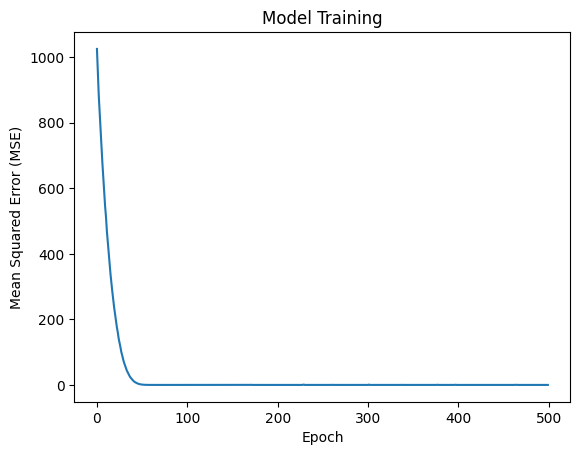

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

def fit_model(model, celsius_data, fahrenheit_data, learning_rate=0.01, epochs=500, batch_size=1):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(celsius_data, fahrenheit_data, epochs=epochs, batch_size=batch_size, verbose=1)
    return history

# Generate more data points
celsius_temps_large = np.random.uniform(low=-100, high=100, size=100)
fahrenheit_temps_large = celsius_temps_large * 1.8 + 32

# Build the model
model_large = keras.Sequential([
    layers.Dense(units=1, input_shape=[1])  # One layer with one neuron
])

# Fit the model
history = fit_model(model_large, celsius_temps_large, fahrenheit_temps_large)

# Get the weights and bias
weights_large, bias_large = model_large.layers[0].get_weights()

# Display the weights
print(f'Weight (w0): {weights_large[0][0]}')
print(f'Bias (w1): {bias_large[0]}')

# Plot the training history
plt.plot(history.history['loss'])
plt.title('Model Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()
